# Import Libraries

In [1]:
import math
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import LSTM, GRU

from math import sqrt
from pandas import concat
from matplotlib import pyplot
from keras.models import Sequential
from numpy import concatenate, asarray
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# ---------- Retrieve Data -----------

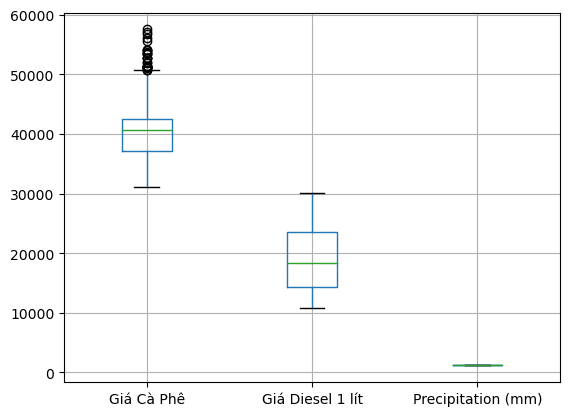

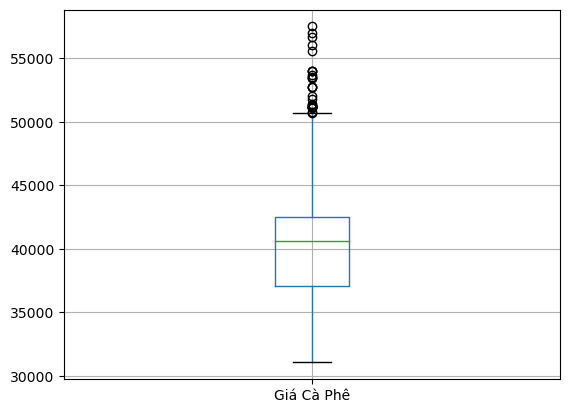

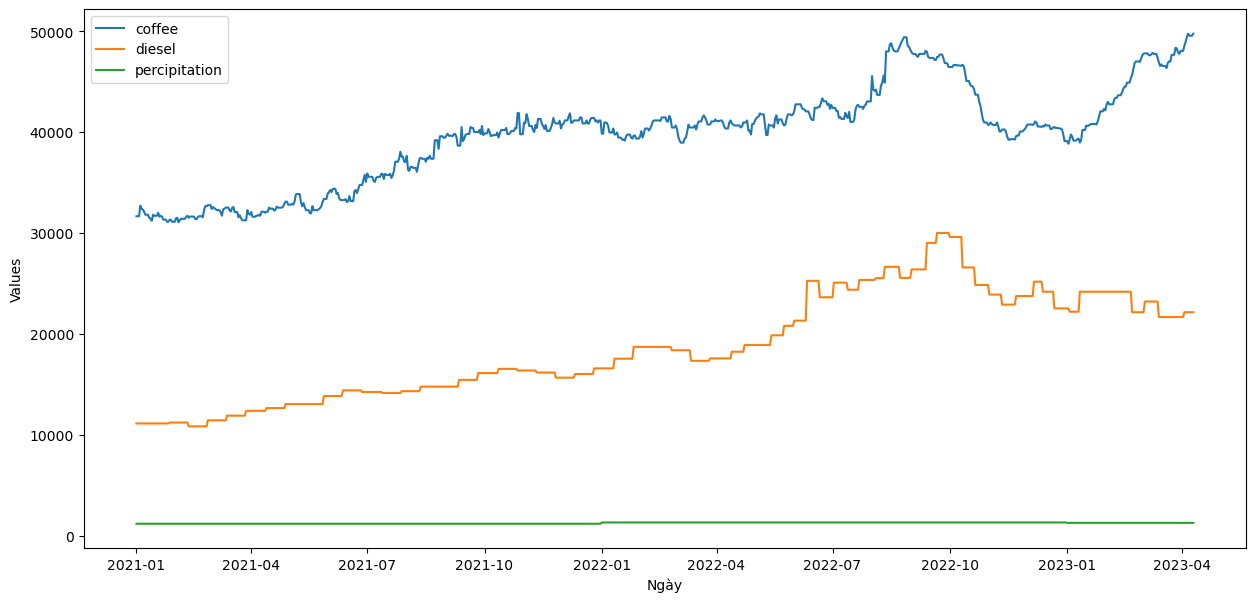

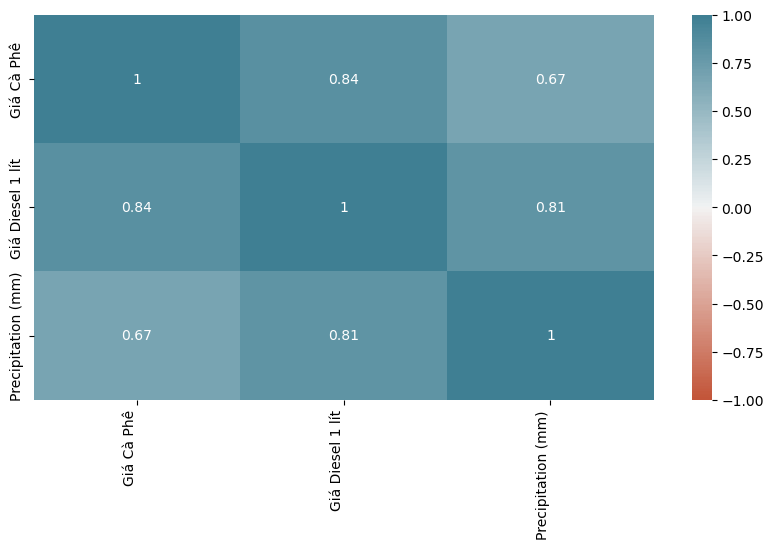

Stored 'data' (DataFrame)
592 148
(592, 1, 60) (592,) (148, 1, 60) (148,)
Stored 'train_X' (ndarray)
Stored 'train_y' (ndarray)
Stored 'test_X' (ndarray)
Stored 'test_y' (ndarray)


In [2]:
%run Data.ipynb

In [3]:
%store -r data
data

,Ngày,Giá Cà Phê,Giá Diesel 1 lít,Precipitation (mm)
0,2021-01-01,31667.5,11120.0,1174.199994
1,2021-01-02,31667.5,11120.0,1174.199994
2,2021-01-03,31667.5,11120.0,1174.199994
3,2021-01-04,32717.0,11120.0,1174.199994
4,2021-01-05,32417.0,11120.0,1174.199994
...,...,...,...,...
825,2023-04-06,49766.5,22150.0,1259.800013
826,2023-04-07,49566.5,22150.0,1259.800013
827,2023-04-08,49566.5,22150.0,1259.800013
828,2023-04-09,49566.5,22150.0,1259.800013


In [4]:
# # read file
# data = pd.read_excel('Dataset/data.xlsx')
# data.head()

In [5]:
# take coffee price only
data.drop(data.columns[[-1, -2]], axis=1, inplace=True)

# --------- Normalization ----------

In [6]:
# drop date column
data.drop(data.columns[[0]], axis=1, inplace=True)

In [7]:
# convert series to supervised learning

def series_to_supervised(data, n_in, n_out, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [8]:
# set number of days
look_back = 60
predict_ahead = 30

# frame as supervised learning
reframed = series_to_supervised(data.values, look_back, predict_ahead)

In [9]:
# calculate total column to keep
data_column = len(data.columns)
keep_column = look_back * data_column
var_index = (look_back * data_column) + ((predict_ahead - 1) * data_column)

# drop unnecessary columns
reframed = reframed.drop(reframed.iloc[:, keep_column:var_index], axis = 1)
# index_drop = (data_column - 1 ) * -1
# reframed = reframed.drop(columns=reframed.columns[index_drop:], axis = 1)
# dataset = reframed

In [10]:
# normalize features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(reframed)
scaled.shape

(740, 61)

# ---------- Split data ----------

In [11]:
dataset = scaled

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))

592 148


In [12]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(592, 1, 60) (592,) (148, 1, 60) (148,)


# ---------- Train Model ----------

Epoch 1/1000
10/10 [==============================] - 5s 93ms/step - loss: 0.2498 - val_loss: 0.2059
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1053 - val_loss: 0.1925
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0942 - val_loss: 0.1871
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0874 - val_loss: 0.1833
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0829 - val_loss: 0.1805
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0855 - val_loss: 0.1773
Epoch 7/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0835 - val_loss: 0.1751
Epoch 8/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0878 - val_loss: 0.1723
Epoch 9/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0820 - val_loss: 0.1703
Epoch 10/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0864 - val_loss: 0.167

10/10 [==============================] - 0s 6ms/step - loss: 0.0634 - val_loss: 0.1305
Epoch 83/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0715 - val_loss: 0.1446
Epoch 84/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0696 - val_loss: 0.1484
Epoch 85/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0627 - val_loss: 0.1244
Epoch 86/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0744 - val_loss: 0.1509
Epoch 87/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0661 - val_loss: 0.1448
Epoch 88/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0623 - val_loss: 0.1303
Epoch 89/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0693 - val_loss: 0.1405
Epoch 90/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0694 - val_loss: 0.1497
Epoch 91/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0637 - val_loss: 0.1203
Epoc

10/10 [==============================] - 0s 6ms/step - loss: 0.0600 - val_loss: 0.1359
Epoch 163/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0610 - val_loss: 0.1193
Epoch 164/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0652 - val_loss: 0.1307
Epoch 165/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0565 - val_loss: 0.1294
Epoch 166/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0571 - val_loss: 0.1198
Epoch 167/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0628 - val_loss: 0.1270
Epoch 168/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0593 - val_loss: 0.1342
Epoch 169/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0605 - val_loss: 0.1193
Epoch 170/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0647 - val_loss: 0.1292
Epoch 171/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0565 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 0.0618 - val_loss: 0.1273
Epoch 243/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0653 - val_loss: 0.1234
Epoch 244/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0689 - val_loss: 0.1191
Epoch 245/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0543 - val_loss: 0.1213
Epoch 246/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0541 - val_loss: 0.1091
Epoch 247/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0624 - val_loss: 0.1251
Epoch 248/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0544 - val_loss: 0.1140
Epoch 249/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0581 - val_loss: 0.1196
Epoch 250/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0537 - val_loss: 0.1225
Epoch 251/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0536 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 0.0595 - val_loss: 0.1123
Epoch 323/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0547 - val_loss: 0.1268
Epoch 324/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0618 - val_loss: 0.1153
Epoch 325/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0604 - val_loss: 0.1161
Epoch 326/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0593 - val_loss: 0.1228
Epoch 327/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0563 - val_loss: 0.1149
Epoch 328/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0537 - val_loss: 0.1165
Epoch 329/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0534 - val_loss: 0.1187
Epoch 330/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0584 - val_loss: 0.1152
Epoch 331/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0596 - val_loss: 0.

10/10 [==============================] - 0s 6ms/step - loss: 0.0520 - val_loss: 0.1143
Epoch 403/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0503 - val_loss: 0.1102
Epoch 404/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0530 - val_loss: 0.1146
Epoch 405/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0526 - val_loss: 0.1224
Epoch 406/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0511 - val_loss: 0.1088
Epoch 407/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0531 - val_loss: 0.1152
Epoch 408/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0496 - val_loss: 0.1122
Epoch 409/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0515 - val_loss: 0.1123
Epoch 410/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0513 - val_loss: 0.1171
Epoch 411/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0497 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 0.0653 - val_loss: 0.1374
Epoch 483/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0685 - val_loss: 0.1294
Epoch 484/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0489 - val_loss: 0.1044
Epoch 485/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0496 - val_loss: 0.1111
Epoch 486/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0486 - val_loss: 0.1109
Epoch 487/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0501 - val_loss: 0.1096
Epoch 488/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0516 - val_loss: 0.1129
Epoch 489/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0485 - val_loss: 0.1093
Epoch 490/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0508 - val_loss: 0.1071
Epoch 491/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0500 - val_loss: 0.

10/10 [==============================] - 0s 7ms/step - loss: 0.0498 - val_loss: 0.1131
Epoch 563/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0517 - val_loss: 0.1042
Epoch 564/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0538 - val_loss: 0.1047
Epoch 565/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0470 - val_loss: 0.1106
Epoch 566/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0503 - val_loss: 0.1031
Epoch 567/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0537 - val_loss: 0.1080
Epoch 568/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0498 - val_loss: 0.1012
Epoch 569/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0527 - val_loss: 0.1084
Epoch 570/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0501 - val_loss: 0.1051
Epoch 571/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0505 - val_loss: 0.

10/10 [==============================] - 0s 6ms/step - loss: 0.0475 - val_loss: 0.1066
Epoch 643/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0491 - val_loss: 0.1037
Epoch 644/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0477 - val_loss: 0.1124
Epoch 645/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0524 - val_loss: 0.1046
Epoch 646/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0530 - val_loss: 0.0991
Epoch 647/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0482 - val_loss: 0.1160
Epoch 648/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0588 - val_loss: 0.1217
Epoch 649/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0596 - val_loss: 0.1066
Epoch 650/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0494 - val_loss: 0.1126
Epoch 651/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0581 - val_loss: 0.

10/10 [==============================] - 0s 6ms/step - loss: 0.0527 - val_loss: 0.1043
Epoch 723/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0544 - val_loss: 0.1094
Epoch 724/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0487 - val_loss: 0.1027
Epoch 725/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0467 - val_loss: 0.0988
Epoch 726/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0489 - val_loss: 0.1068
Epoch 727/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0508 - val_loss: 0.1039
Epoch 728/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0505 - val_loss: 0.1041
Epoch 729/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0485 - val_loss: 0.0997
Epoch 730/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0479 - val_loss: 0.1047
Epoch 731/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0468 - val_loss: 0.

10/10 [==============================] - 0s 6ms/step - loss: 0.0490 - val_loss: 0.1028
Epoch 803/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0473 - val_loss: 0.1142
Epoch 804/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0539 - val_loss: 0.1170
Epoch 805/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0538 - val_loss: 0.1058
Epoch 806/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0460 - val_loss: 0.1011
Epoch 807/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0444 - val_loss: 0.1099
Epoch 808/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0459 - val_loss: 0.1097
Epoch 809/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0467 - val_loss: 0.1143
Epoch 810/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0455 - val_loss: 0.1068
Epoch 811/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0470 - val_loss: 0.

10/10 [==============================] - 0s 6ms/step - loss: 0.0461 - val_loss: 0.1259
Epoch 883/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0471 - val_loss: 0.1210
Epoch 884/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0463 - val_loss: 0.1232
Epoch 885/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0476 - val_loss: 0.1175
Epoch 886/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0474 - val_loss: 0.1336
Epoch 887/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0489 - val_loss: 0.1283
Epoch 888/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0470 - val_loss: 0.1341
Epoch 889/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0448 - val_loss: 0.1292
Epoch 890/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0456 - val_loss: 0.1305
Epoch 891/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0431 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 0.0422 - val_loss: 0.1620
Epoch 963/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0415 - val_loss: 0.1448
Epoch 964/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0412 - val_loss: 0.1465
Epoch 965/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0412 - val_loss: 0.1522
Epoch 966/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0465 - val_loss: 0.1459
Epoch 967/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0466 - val_loss: 0.1529
Epoch 968/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0427 - val_loss: 0.1394
Epoch 969/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0435 - val_loss: 0.1515
Epoch 970/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0404 - val_loss: 0.1536
Epoch 971/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0451 - val_loss: 0.

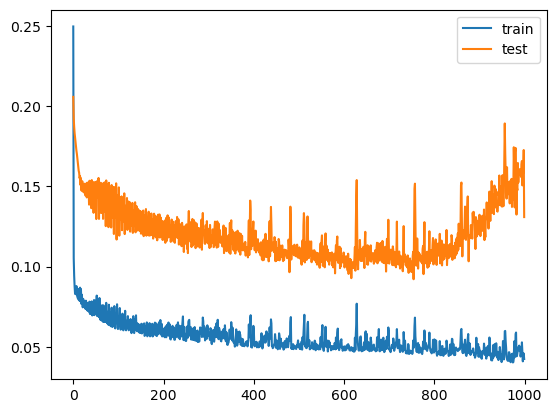

In [13]:
# # design network
# model = Sequential()
# model.add(LSTM(10, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dropout(0.3))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')

# # fit network
# history = model.fit(train_X, train_y, epochs=1000, batch_size=32, 
#                     validation_data=(test_X, test_y), verbose=False, shuffle=False)

# # plot history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()


# Create the GRU model
model = Sequential()
model.add(GRU(75, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(GRU(units=32, return_sequences=True))
model.add(GRU(units=32))
model.add(Dense(units=1))

# Compile the model
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=1000,validation_data=(test_X, test_y), batch_size=64, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# ---------- Testing & Results Analysis ----------

In [14]:
# calculate metrics
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = sklearn.metrics.mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

def print_metrics(test, pre_test):
    
    testScore = np.sqrt(mean_squared_error(test,pre_test))
    print('RMSE: %.2f (đồng)' % (testScore))
    
    testScore = sklearn.metrics.mean_absolute_error(test, pre_test)
    print('\nMAE: %.2f (đồng)' % (testScore))
                            
    testScore = sklearn.metrics.mean_absolute_percentage_error(test, pre_test)
    print('\nMAPE: %.2f' % (testScore))
    
    testScore = mean_absolute_scaled_error(test, pre_test, test)
    print('\nMASE: %.2f' % (testScore))

In [15]:
# make a prediction
test_pred = (model.predict(test_X))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

5/5 [==============================] - 1s 2ms/step


In [16]:
# invert scaling for forecast
inv_test_pred = concatenate((test_pred, test_X), axis=1)
inv_test_pred = scaler.inverse_transform(inv_test_pred)
inv_test_pred = inv_test_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [17]:
# print results
print_metrics(inv_y, inv_test_pred)

RMSE: 2798.33 (đồng)

MAE: 2401.56 (đồng)

MAPE: 0.06

MASE: 13.78


# ---------- Predicting ----------

In [18]:
# take the last look back days
df = data.tail(look_back)

In [19]:
# normalize features
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [20]:
# convert rows to columns
dataset = df.T

# convert
# dataset = df.to_numpy() 

# reshape
X = dataset.reshape((dataset.shape[0], 1, dataset.shape[1]))

In [21]:
# predict
prediction = model.predict(X)

1/1 [==============================] - 0s 16ms/step


In [22]:
# replace 1st value by prediction result in order to invert scale
df[0] = prediction

# invert scaling
inv_prediction = scaler.inverse_transform(df)
final_result = inv_prediction[0]

In [23]:
final_result[0]

48307.867959976196

In [24]:
inv_prediction

array([[48307.86795998],
       [43666.5       ],
       [43666.5       ],
       [43916.5       ],
       [44266.5       ],
       [44516.5       ],
       [44516.5       ],
       [44916.5       ],
       [44916.5       ],
       [44916.5       ],
       [45366.5       ],
       [45666.5       ],
       [46266.5       ],
       [46866.5       ],
       [47016.5       ],
       [47016.5       ],
       [47016.5       ],
       [46966.5       ],
       [47266.5       ],
       [47616.5       ],
       [47800.        ],
       [47816.5       ],
       [47816.5       ],
       [47816.5       ],
       [47666.5       ],
       [47616.5       ],
       [47716.5       ],
       [47866.5       ],
       [47766.5       ],
       [47766.5       ],
       [47766.5       ],
       [47366.5       ],
       [46916.5       ],
       [46566.5       ],
       [46716.5       ],
       [46566.5       ],
       [46566.5       ],
       [46566.5       ],
       [46366.5       ],
       [46866.5       ],


In [28]:
# read file
data2 = pd.read_excel('Dataset/data.xlsx')
data2

,Ngày,Giá Cà Phê,Giá Diesel 1 lít,Precipitation (mm)
0,2021-01-01,31667.5,11120,1174.199994
1,2021-01-02,31667.5,11120,1174.199994
2,2021-01-03,31667.5,11120,1174.199994
3,2021-01-04,32717.0,11120,1174.199994
4,2021-01-05,32417.0,11120,1174.199994
...,...,...,...,...
824,2023-04-06,49766.5,22150,1259.800013
825,2023-04-07,49566.5,22150,1259.800013
826,2023-04-08,49566.5,22150,1259.800013
827,2023-04-09,49566.5,22150,1259.800013


In [29]:
# Create a DataFrame for your array
predicted_coffee_df = pd.DataFrame(inv_prediction, columns=['Giá Cà Phê'])

In [30]:
predicted_coffee_df

,Giá Cà Phê
0,48307.86796
1,43666.50000
2,43666.50000
3,43916.50000
4,44266.50000
5,44516.50000
6,44516.50000
7,44916.50000
8,44916.50000
9,44916.50000
